# Analysis of Boat Data

In [1]:
import numpy as np
import pandas as pd

# Data Collection and Processing

In [44]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [46]:
#there are null values in some columns
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

### Remove Duplicates

In [47]:
#Deal with Duplicate value
df.drop_duplicates(inplace = True)

In [48]:
#no duplicate values
df.value_counts(dropna=False).sum()

9888

### Fix structural errors

In [49]:
#Location section is not unified. We need to split the country, city, and town first.
df['Location'].value_counts()

Netherlands Â» In verkoophaven                      309
Croatia (Hrvatska)                                  244
Italy Â» Toscana Â» Toscana                         173
Italy                                               155
France                                              152
                                                   ... 
Italy Â» La Spezia, Italie                            1
France Â» Bretagne Â» Bretagne                        1
Italy Â» Linz Marine Test Centre "Italo Monzino"      1
Italy Â» Adriatic Sea (Fano)                          1
Switzerland Â» Bielersee Â» Gerolfingen               1
Name: Location, Length: 2995, dtype: int64

In [50]:
df[['Country','City','Town']] = df['Location'].str.split(" Â» ", 2, expand=True)

In [51]:
df[['Country','City','Town']]

,Country,City,Town
0,Switzerland,Lake Geneva,VÃ©senaz
1,Germany,BÃ¶nningstedt,None
2,Switzerland,Lake of Zurich,StÃ¤fa ZH
3,Denmark,Svendborg,None
4,Germany,Bayern,MÃ¼nchen
...,...,...,...
9883,Switzerland,Lago Maggiore,Riazzino
9884,Germany,Hamburg,HAMBURG
9885,Germany,Nordrhein-Westfalen,Wesel
9886,Italy,Dormelletto,None


In [52]:
#Town is irrelevant and we drop that column, we can drop the Location too as it is splited
df.drop(['Town','Location'],axis=1,inplace=True)

In [53]:
df['Country'].value_counts().head(10)

Germany               1914
Italy                 1793
France                1229
Switzerland           1112
Netherlands           1056
Croatia (Hrvatska)     810
Spain                  702
United Kingdom         215
Denmark                172
Portugal               135
Name: Country, dtype: int64

In [54]:
# We can strip the 'power boats' word from Manufacturer	
df['Manufacturer'] = df['Manufacturer'].str.strip(" power boats")
df['Manufacturer'].value_counts()

BÃ©nÃ©teau                      631
Jeanneau                        537
Sunseek                         383
Princ                           241
Sea Ray                         239
                               ... 
Perini Navi S                     1
Palmer Johnson                    1
Rodriguez Group (Italyachts)      1
Abeking & Rasmussen               1
Hun                               1
Name: Manufacturer, Length: 896, dtype: int64

In [55]:
#change BÃ©nÃ©teau to Beneteau
df.replace('BÃ©nÃ©teau','Beneteau',inplace=True)

In [56]:
#Price is not uniformed, we need to convert them to EUR
df['Currency'] = df['Price'].str[:3]
df['PriceA']=df['Price'].str[3:]
df['PriceA'] = df['PriceA'].astype(float)
df[['Currency','PriceA']].head()

,Currency,PriceA
0,CHF,3337.0
1,EUR,3490.0
2,CHF,3770.0
3,DKK,25900.0
4,EUR,3399.0


In [57]:
df['Currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: Currency, dtype: int64

In [58]:
#iterate through to conduct currency transfer
Alist = []
for i in range(9888):
    if df['Currency'][i] == 'CHF':
        Alist.append(df['PriceA'][i]*0.98)
    elif df['Currency'][i] == 'Â£':
        Alist.append(df['PriceA'][i]*1.17)
    elif df['Currency'][i] == 'DKK':
        Alist.append(df['PriceA'][i]*0.13)
    else:
        Alist.append(df['PriceA'][i])

for i in range(len(Alist)):
    Alist[i] = int(Alist[i])
    
df['Price Adjust EUR'] = pd.DataFrame(Alist)

In [59]:
# Drop Currency and PriceA, and set price column to Price Adjust EUR Column
df['Price']=df['Price Adjust EUR']
df.drop(['Price Adjust EUR','Currency','PriceA'],axis=1, inplace=True)

In [60]:
# We should drop Year Built = 0 column.
df = df[df['Year Built'] != 0]

In [61]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City
0,3270,Motor Yacht,Rigiflex,new boat from stock,2017,4.00,1.90,NaN,226,Switzerland,Lake Geneva
1,3490,Center console boat,Terhi,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt
3,3367,Sport Boat,Pion,new boat from stock,2020,3.00,1.00,NaN,64,Denmark,Svendborg
4,3399,Fishing Boat,Lind,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern
6,3528,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,Switzerland,Neuenburgersee


### Process Null Value

In [62]:
#there are null values in some columns
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1286
Type                              5
Year Built                        0
Length                            9
Width                            55
Material                       1662
Number of views last 7 days       0
Country                          36
City                            888
dtype: int64

- There are a lot of Manufacturer, Material null values and it is unrealistic to drop them all. Therefore, we will assign them as 'unknown' and exclude them during further analysis
- It is ok for 'City' to be null as long as we know what country these boats are in
- City has 36 null value. It is unlikely these 36 values will affect our result and we can go ahead and drop them. Similar for Length, Width, and Type

In [63]:
#Perfrom drop null value.
df.dropna(subset=['Type','Length','Width','Country'],inplace=True)
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1263
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1627
Number of views last 7 days       0
Country                           0
City                            842
dtype: int64

In [64]:
df['Manufacturer'].fillna('unknown',inplace=True)
df['Material'].fillna('unknown',inplace=True)
df['City'].fillna('unknown',inplace=True)
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
Country                        0
City                           0
dtype: int64

In [67]:
df.shape

(9241, 11)

# Exploratory Analysis

In [23]:
#Top 5 Viewed Boats
df.sort_values(['Number of views last 7 days'],ascending=False).head(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City
9580,14602,Motor Yacht,Baylin,"Used boat,Unleaded",1992,7.70,2.46,Plastic,3263,Switzerland,Le Landeron (NE)
8723,34300,Hardtop,Princ,"Used boat,Diesel",1979,11.12,3.88,GRP,2432,Switzerland,Neuenburgersee
6211,123382,"Bowrider,Motor Yacht,Sport Boat",Windy,"Used boat,Diesel",2002,12.35,3.48,GRP,2261,Switzerland,Lago Maggiore
3700,949000,Hardtop,Pershing,"Used boat,Diesel",2009,20.30,5.20,GRP,2154,Neustadt in Holstein (Ostsee),unknown
308,19502,Sport Boat,Sea Ray,"Used boat,Unleaded",1993,6.14,2.34,Plastic,2026,Switzerland,Murtensee


In [24]:
#Top 5 Country with highest number of views
dfpivot = pd.pivot_table(df,index=['Country'],values=['Number of views last 7 days'],aggfunc=sum)
dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(5)

,Number of views last 7 days
Country,
Switzerland,344736
Germany,253681
Italy,206235
Netherlands,117527
France,116428


In [25]:
#Top 5 Manufacturer with highest number of views. The first is unknown column, we use iloc to skip it
dfpivot = pd.pivot_table(df,index=['Manufacturer'],values=['Number of views last 7 days'],aggfunc=sum)
dfpivot = dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(6)
dfpivot.iloc[1:]

,Number of views last 7 days
Manufacturer,
Beneteau,54485
Sunseek,49771
Jeanneau,47354
Sea Ray,42254
Princ,38577


In [26]:
#Top 5 types of boat with highest number of views
dfpivot = pd.pivot_table(df,index=['Boat Type'],values=['Number of views last 7 days'],aggfunc=sum)
dfpivot = dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(5)
dfpivot

,Number of views last 7 days
Boat Type,
Motor Yacht,336931
Sport Boat,228577
Flybridge,125467
Cabin Boat,122204
Trawler,72711


### SQL Exploratory Analysis

In [27]:
#Sql Analysis Package
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

In [28]:
#Top 5 Most Expensive Yachts
mysql('select * from df\
      order by price desc limit 5')

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City
0,31000000,Mega Yacht,Majesty Yach,"new boat from stock,Diesel",2020,54.4,9.6,unknown,1009,United Arab Emirates,Dubai & VAE
1,24050000,Mega Yacht,Majesty Yach,"new boat from stock,Diesel",2020,47.6,9.6,unknown,304,United Arab Emirates,Dubai & VAE
2,23500000,Mega Yacht,Benetti,"Used boat,Diesel",2007,56.0,10.4,Steel,419,Greece,Athen
3,16900000,Mega Yacht,Bandido Yach,"new boat from stock,Diesel",2020,40.0,9.5,unknown,110,Germany,unknown
4,16750000,Mega Yacht,Moonen,new boat from stock,2020,36.3,8.0,unknown,130,Germany,Nordsee Holland


In [29]:
#Top 5 Viewed Boats by Material
mysql('select Material, sum("Number of views last 7 days") as Total_View from df\
      group by Material\
      having Material != "unknown"\
      order by Total_View desc limit 5')

,Material,Total_View
0,GRP,846093
1,Steel,121206
2,PVC,95407
3,Wood,50424
4,Plastic,38122


In [30]:
#Top 10 Viewed Boats by Year built
mysql('select "Year Built", sum("Number of views last 7 days") as Total_View from df\
      group by "Year Built"\
      order by Total_View desc limit 5')

,Year Built,Total_View
0,2020,175732
1,2019,88013
2,2006,52334
3,2008,51167
4,2007,47961


In [31]:
#Top 5 Viewed Boats Park at which City
mysql('select City, sum("Number of views last 7 days") as Total_View from df\
      group by City\
      having City != "unknown"\
      order by Total_View desc limit 10')

,City,Total_View
0,Lake Constance,64331
1,Lake of Zurich,49252
2,Lake Geneva,37486
3,VierwaldstÃ¤ttersee,35591
4,In verkoophaven,32376
5,Mallorca,28737
6,Lago Maggiore,28096
7,Neuenburgersee,27590
8,Toscana,19450
9,Bayern,18710


In [32]:
#Top 5 Boats veiwed by Manufacturer, Material
mysql('select Manufacturer, Material, sum("Number of views last 7 days") as Total_View from df\
      group by Manufacturer, Material\
      having Manufacturer != "unknown" and Material!= "unknown"\
      order by Total_View desc limit 5')

,Manufacturer,Material,Total_View
0,Sunseek,GRP,40221
1,Sea Ray,GRP,31937
2,Princ,GRP,29776
3,Beneteau,PVC,27962
4,Cranchi,GRP,26096


## Visualization

### Does Expensive Boat Get More View?

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

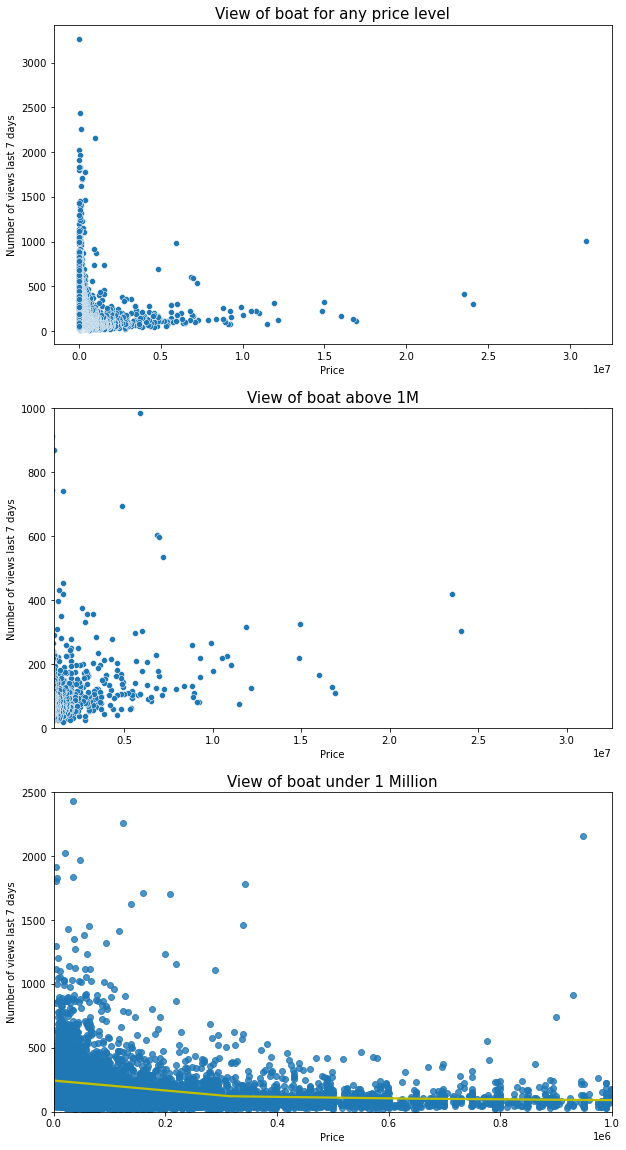

In [34]:
#Plot of view by price. There are outliers and we are not looking at expensive yeacht.
#Therefore we will plot only those under 1 Million
ax1 = plt.subplot(3,1,1)
sns.scatterplot(data=df,x='Price',y="Number of views last 7 days")
ax1.set_title('View of boat for any price level', fontsize=15)

ax2 = plt.subplot(3,1,2)
sns.scatterplot(data=df,x='Price',y="Number of views last 7 days")
plt.xlim(1e6,)
plt.ylim(0,1000)
ax2.set_title('View of boat above 1M', fontsize=15)


ax3 = plt.subplot(3,1,3)
sns.regplot(data=df,x='Price',y="Number of views last 7 days",line_kws={'color': 'y'},logx=True)
plt.xlim(0,1e6)
plt.ylim(0,2500)
ax3.set_title('View of boat under 1 Million', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(10, 20)
plt.show()

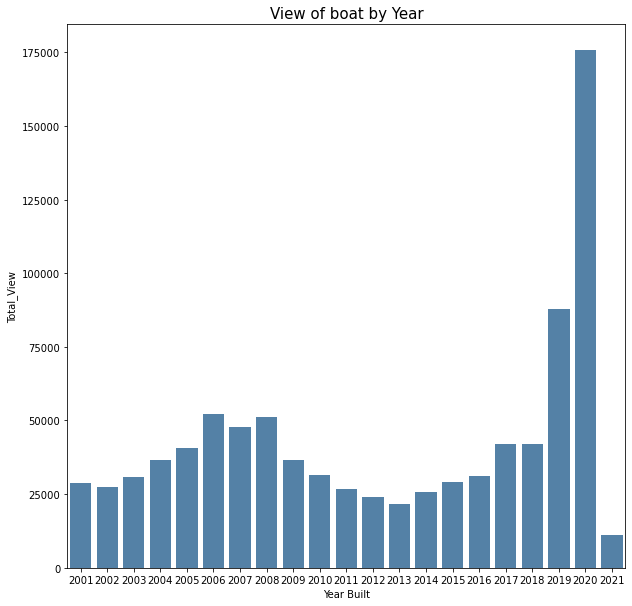

In [35]:
#Plot of view by Year
data = mysql('select "Year Built", sum("Number of views last 7 days") as Total_View from df\
      group by "Year Built"\
      having "Year Built" > 2000\
      order by "Year Built" desc')
sns.barplot(data=data,x="Year Built",y="Total_View",color = 'steelblue')
plt.title('View of boat by Year', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

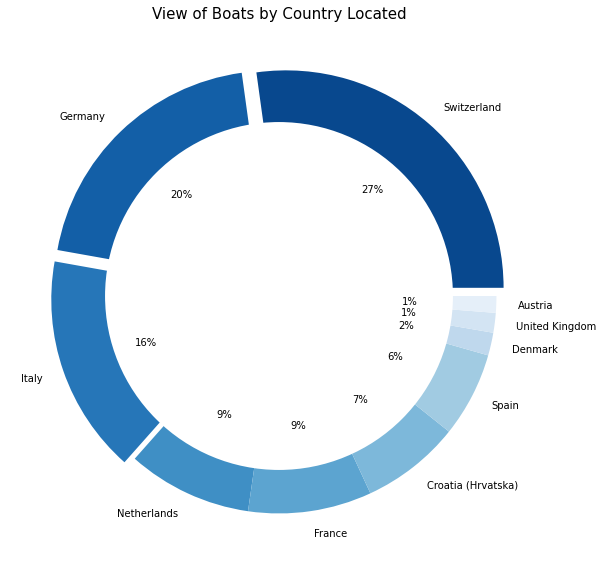

In [36]:
#Plot of view by Country Located
dfpivot = pd.pivot_table(df,index=['Country'],values=['Number of views last 7 days'],aggfunc=sum)
data = dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(10)

label = data.index
color = sns.color_palette('Blues_r', n_colors=10)
explode = (0.05,0.05,0.05,0,0,0,0,0,0,0)
plt.pie(data['Number of views last 7 days'], labels = label, colors=color, explode=explode, autopct='%.0f%%')
plt.title('View of Boats by Country Located', fontsize=15)

centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [37]:
#Plot of view by Manufactuer
import squarify

In [38]:
dfpivot = pd.pivot_table(df,index=['Manufacturer'],values=['Number of views last 7 days'],aggfunc=sum)
d = dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(11)
data = d.iloc[1:]
data.index

Index(['Beneteau', 'Sunseek', 'Jeanneau', 'Sea Ray', 'Princ', 'Bavari',
       'Baylin', 'Cranchi', 'Azimu', 'Fairlin'],
      dtype='object', name='Manufacturer')

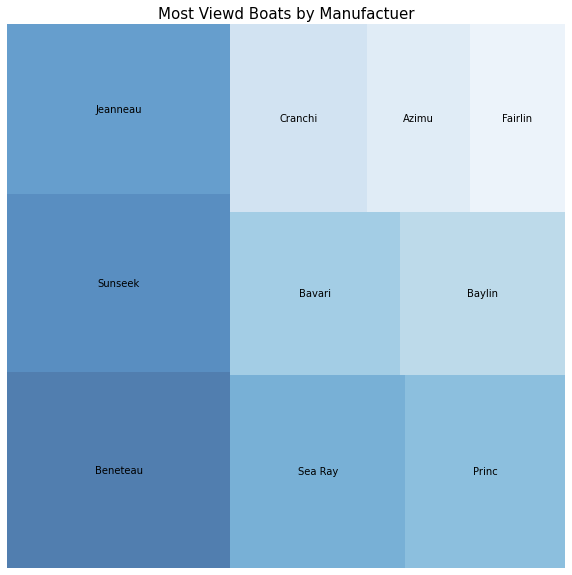

In [39]:
label = data.index

squarify.plot(sizes=data['Number of views last 7 days'], label=label, 
              color = sns.color_palette("Blues_r",10),
              alpha=0.7)
plt.title('Most Viewd Boats by Manufactuer',size=15)
plt.axis('off')

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

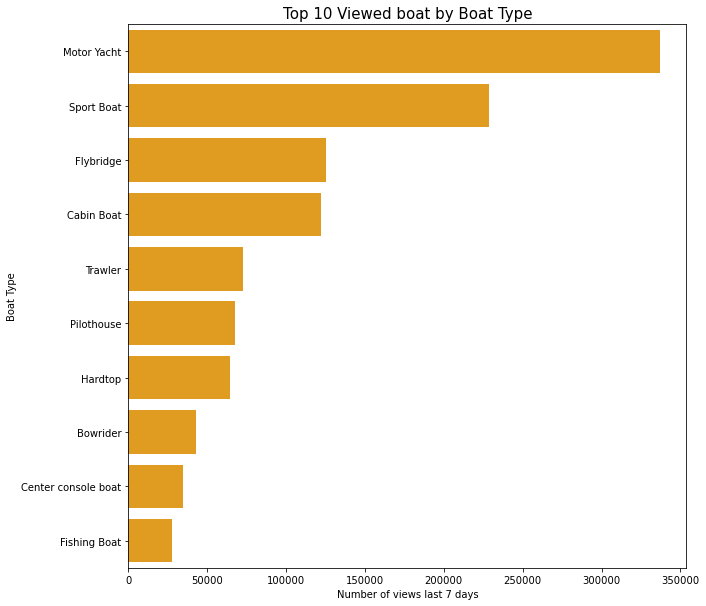

In [40]:
#View of Boat by Boat Type
dfpivot = pd.pivot_table(df,index=['Boat Type'],values=['Number of views last 7 days'],aggfunc=sum)
data = dfpivot.sort_values(['Number of views last 7 days'], ascending=False).head(10)
x = data.index
sns.barplot(data=data,x=data['Number of views last 7 days'],y=data.index,color = 'orange',orient='h')
plt.title('Top 10 Viewed boat by Boat Type', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

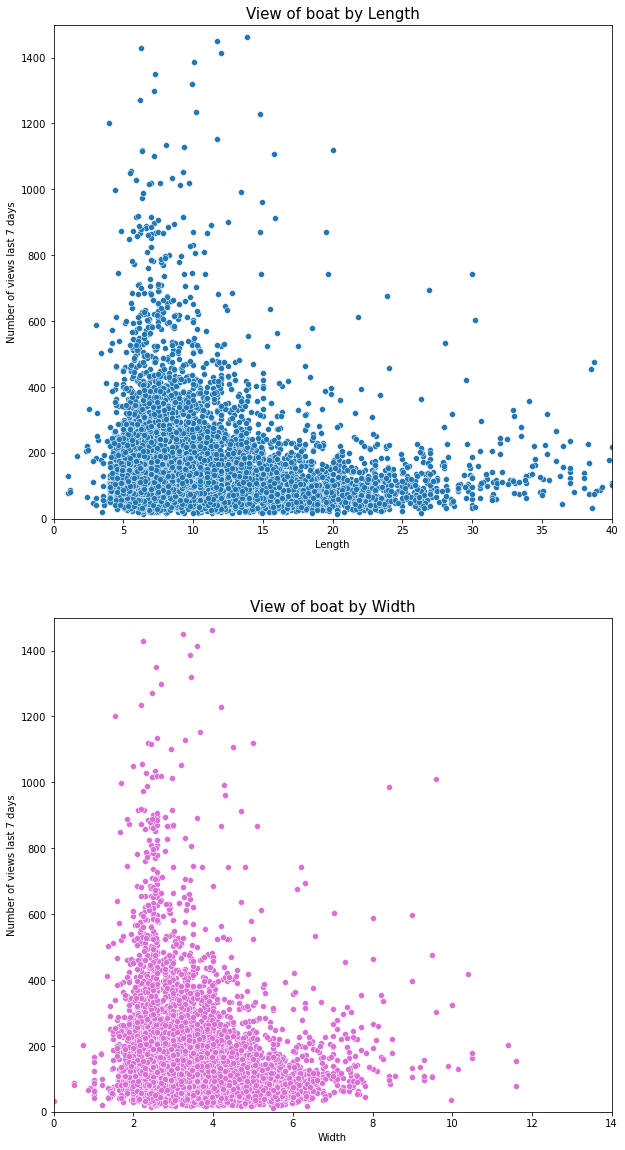

In [41]:
#View of Boat by Width and Length. Exclude Outliers
ax1 = plt.subplot(2,1,1)
sns.scatterplot(data=df,x='Length',y="Number of views last 7 days")
ax1.set_title('View of boat by Length', fontsize=15)
plt.xlim(0,40)
plt.ylim(0,1500)

ax2 = plt.subplot(2,1,2)
sns.scatterplot(data=df,x='Width',y="Number of views last 7 days",color='orchid')
ax2.set_title('View of boat by Width', fontsize=15)
plt.xlim(0,14)
plt.ylim(0,1500)

fig = plt.gcf()
fig.set_size_inches(10, 20)
plt.show()

In [42]:
#They look very similar Highest view usually have length around 5-10 meters and width around 2-4 meters